In [95]:
import json
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
from pprint import pprint
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import numpy as np
from collections import Counter
import re
from datetime import datetime
from scipy import stats
from matplotlib import ticker as mticker

pd.set_option("display.max_columns", None)

In [31]:
filtered_dataset_df = pd.read_csv("filtered_summary_with_label.csv", index_col="pr_key")
filtered_pr_list = filtered_dataset_df.index.values.tolist()
filtered_dataset_df

,pr_user_id,pr_user_login,pr_user_type,owner,repo_name,pr_num,num_commit,commit_msg,added_loc_sum,deleted_loc_sum,added_loc_avg_per_file,deleted_loc_avg_per_file,added_loc_avg_per_commit,deleted_loc_avg_per_commit,num_file,file_name,title,description,link,pr_user_bot,pr_state,pr_merged,package_key,labels,labels_count
pr_key,,,,,,,,,,,,,,,,,,,,,,,,,
007design:gulp-prefix:1,344809,ViktorQvarfordt,submitter,007design,gulp-prefix,1,1,['Update README.md\n\nUse different variable n...,2,2,2.000000,2.000000,2.000000,2.000000,1,['README.md'],Update README.md,Use different variable names for prefix and th...,https://github.com/007design/gulp-prefix/pull/1,User,closed,True,007design:gulp-prefix,[],0
007design:gulp-prefix:4,106069,dhcmrlchtdj,submitter,007design,gulp-prefix,4,1,['fix for empty file\n\n'],2,1,2.000000,1.000000,2.000000,1.000000,1,['index.js'],fix for empty file,"```\ngulp.task('prefix', function() {\n var...",https://github.com/007design/gulp-prefix/pull/4,User,closed,True,007design:gulp-prefix,[],0
007design:gulp-prefix:8,3592553,alexeybondarenko,submitter,007design,gulp-prefix,8,3,"['.idea to gitignore\n\n', 'remove unused vars...",4,8,1.333333,2.666667,1.333333,2.666667,3,"['index.js', '.gitignore']",Remove reading file,Using content from vinyl file object\n,https://github.com/007design/gulp-prefix/pull/8,User,closed,True,007design:gulp-prefix,[],0
007design:gulp-prefix:9,5065720,xdimh,submitter,007design,gulp-prefix,9,1,['update url-join in package.json\n\n'],5,5,5.000000,5.000000,5.000000,5.000000,1,['package.json'],update url-join in package.json,"url-join is not latest,update it.",https://github.com/007design/gulp-prefix/pull/9,User,open,False,007design:gulp-prefix,[],0
00dani:gulp-dest-atomic:3,49699333,dependabot[bot],submitter,00dani,gulp-dest-atomic,3,1,['Bump acorn from 7.1.0 to 7.1.1\n\nBumps [aco...,3,3,3.000000,3.000000,3.000000,3.000000,1,['package-lock.json'],Bump acorn from 7.1.0 to 7.1.1,Bumps [acorn](https://github.com/acornjs/acorn...,https://github.com/00dani/gulp-dest-atomic/pull/3,Bot,open,False,00dani:gulp-dest-atomic,['dependencies'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzyss86:LunarCalendar:20,5665186,ailin-nemui,submitter,zzyss86,LunarCalendar,20,1,['=?UTF-8?q?=E4=BF=AE=E6=94=B9README=E5=9B=A0=...,26,26,26.000000,26.000000,26.000000,26.000000,1,['README.md'],修改README因为github markdown变化,NaN,https://github.com/zzyss86/LunarCalendar/pull/20,User,open,False,zzyss86:LunarCalendar,[],0
zzyss86:LunarCalendar:27,5326739,penghuili,submitter,zzyss86,LunarCalendar,27,1,['Update README.md\n\n'],26,26,26.000000,26.000000,26.000000,26.000000,1,['README.md'],Make readme more readable,NaN,https://github.com/zzyss86/LunarCalendar/pull/27,User,open,False,zzyss86:LunarCalendar,[],0
zzyss86:LunarCalendar:5,677398,cllu,submitter,zzyss86,LunarCalendar,5,1,['fix issue zzyss86/LunarCalendar#4\n\n'],29,17,1.933333,1.133333,29.000000,17.000000,15,"['lib/LunarCalendar.js', 'hl_build/hl2009.min....",fix issue zzyss86/LunarCalendar#4,NaN,https://github.com/zzyss86/LunarCalendar/pull/5,User,closed,False,zzyss86:LunarCalendar,[],0


In [ ]:
with open ("../package_classify_with_time.json", "r") as infile:
    package_classify_with_time = json.load(infile)

### ========= package point of view ============

In [12]:
pck_per_dict = {} #[committer, submitter]
for index, rows in tqdm(filtered_dataset_df.iterrows(), total=filtered_dataset_df.shape[0]):
    pck_key = rows["package_key"]
    if pck_key not in pck_per_dict:
        pck_per_dict[pck_key] = [0,0]
        
    if rows["pr_user_type"] == "committer":
        pck_per_dict[pck_key][0] += 1
    elif rows["pr_user_type"] == "submitter":
        pck_per_dict[pck_key][1] += 1

pck_per_dict_to_df = {}
for pck_key, value_list in pck_per_dict.items():
    total = sum(value_list)
    propor_in = value_list[0]/total
    propor_ex = value_list[1]/total
    
    pck_per_dict_to_df[pck_key] = [value_list[0], value_list[1], propor_in, propor_ex]

pck_per_df = pd.DataFrame.from_dict(pck_per_dict_to_df, orient='index', 
                                    columns=['#internal', '#external','%internal', '%external'])
pck_per_df.sort_values(by=['#external'], ascending=False)


100%|██████████| 945291/945291 [00:52<00:00, 18072.82it/s]


,#internal,#external,%internal,%external
npm:npm-expansions,14,3015,0.004622,0.995378
prebid:Prebid.js,1232,2759,0.308695,0.691305
angular:material,673,2298,0.226523,0.773477
serverless:serverless,1467,1999,0.423254,0.576746
reduxjs:redux,207,1805,0.102883,0.897117
...,...,...,...,...
regevbr:busywait.js,6,0,1.000000,0.000000
bravissimolabs:eslint-config-bravissimo,1,0,1.000000,0.000000
thomasboyt:peridot,3,0,1.000000,0.000000
kud:browser-js,1,0,1.000000,0.000000


### ========= contributor point of view ============

In [15]:
con_per_dict = {} #[committer, submitter]
for index, rows in tqdm(filtered_dataset_df.iterrows(), total=filtered_dataset_df.shape[0]):
    uid = rows["pr_user_id"]
    uname = rows["pr_user_login"]
    con_key = f"{uid}:{uname}"
    if con_key not in con_per_dict:
        con_per_dict[con_key] = [0,0]
        
    if rows["pr_user_type"] == "committer":
        con_per_dict[con_key][0] += 1
    elif rows["pr_user_type"] == "submitter":
        con_per_dict[con_key][1] += 1

con_per_dict_to_df = {}
for con_key, value_list in con_per_dict.items():
    total = sum(value_list)
    propor_in = value_list[0]/total
    propor_ex = value_list[1]/total
    
    con_per_dict_to_df[con_key] = [value_list[0], value_list[1], propor_in, propor_ex]

con_per_df = pd.DataFrame.from_dict(con_per_dict_to_df, orient='index', 
                                    columns=['#internal', '#external','%internal', '%external'])
con_per_df.sort_values(by=['#external'], ascending=False)

100%|██████████| 945291/945291 [00:55<00:00, 17117.03it/s]


,#internal,#external,%internal,%external
14790466:greenkeeperio-bot,0,114945,0.000000,1.000000
23040076:greenkeeper[bot],0,62837,0.000000,1.000000
27856297:dependabot-preview[bot],35010,32923,0.515361,0.484639
49699333:dependabot[bot],730,24609,0.028809,0.971191
29139614:renovate[bot],27727,9069,0.753533,0.246467
...,...,...,...,...
282994:butterflyhug,9,0,1.000000,0.000000
494633:jalet,14,0,1.000000,0.000000
299129:mynameistechno,3,0,1.000000,0.000000
183679:stenehall,8,0,1.000000,0.000000


## ======= Graph =========

Maen proportion of external PR a package received: 75.02472373088177 %
Maen proportion of external PR a contributor created: 88.86614909821637 %


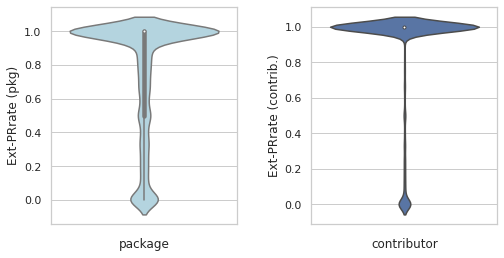

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
plt.subplots_adjust(wspace=0.4) #top = 0.99, bottom=0.01, hspace=1.5, 
sns.set_theme(style="whitegrid")

###############
box_plot_1 = sns.violinplot(y=pck_per_df["%external"], 
                 showmeans=True, color="lightblue",
                 medianprops=dict(color="red", alpha=0.7),
                 meanprops={
                    "marker": "+",
                    "markeredgecolor": "black",
                    "markersize": "10"},
                 ax=ax1
                )
box_plot_1.set(xlabel="package", ylabel = "Ext-PRrate (pkg)")
df_mean = pck_per_df["%external"].mean()
print("Maen proportion of external PR a package received:",df_mean*100,"%" )
#################

box_plot_2 = sns.violinplot(y=con_per_df["%external"], 
                 showmeans=True,
                 medianprops=dict(color="red", alpha=0.7),
                 meanprops={
                    "marker": "+",
                    "markeredgecolor": "black",
                    "markersize": "10"},
                 ax=ax2
                )
box_plot_2.set(xlabel="contributor", ylabel = "Ext-PRrate (contrib.)")
df_mean = con_per_df["%external"].mean()
print("Maen proportion of external PR a contributor created:", df_mean*100, "%")
###################

plt.savefig("rq1_proportion_violinplot.pdf")

### ===== seperated figure =====


Maen proportion of external PR a package received: 75.02472373088173 %


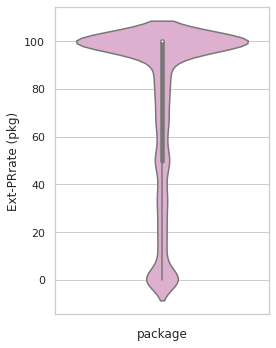

In [88]:
plt.figure(figsize=(4, 5))
pck_per_df["100%external"] = pck_per_df["%external"]*100
# summary_df_new
# print(summary_df_new.columns)

###############
box_plot_1 = sns.violinplot(y=pck_per_df["100%external"], 
                 showmeans=True, color="#e6a8d3",
                 medianprops=dict(color="red", alpha=0.7),
                 meanprops={
                    "marker": "+",
                    "markeredgecolor": "black",
                    "markersize": "10"},
#                  ax=ax1
                )
box_plot_1.set(xlabel="package", ylabel = "Ext-PRrate (pkg)")
df_mean = pck_per_df["100%external"].mean()
print("Maen proportion of external PR a package received:",df_mean,"%" )
#################
# plt.show()
plt.tight_layout()
plt.savefig("rq1_package_a.pdf")

Maen proportion of external PR a contributor created: 88.86614909821637 %


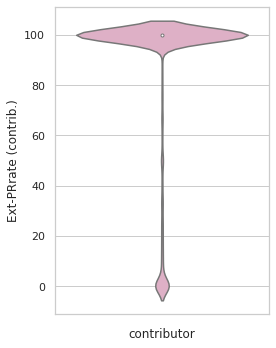

In [92]:
plt.figure(figsize=(4, 5))
con_per_df["100%external"] = con_per_df["%external"]*100

#################

box_plot_2 = sns.violinplot(y=con_per_df["100%external"], 
                 showmeans=True,
                 medianprops=dict(color="red", alpha=0.7),
                 meanprops={
                    "marker": "+",
                    "markeredgecolor": "black",
                    "markersize": "10"},
                 color="#e6a8c5",
                )
box_plot_2.set(xlabel="contributor", ylabel = "Ext-PRrate (contrib.)")
df_mean = con_per_df["%external"].mean()
print("Maen proportion of external PR a contributor created:", df_mean*100, "%")

plt.tight_layout()
plt.savefig("rq1_contributor_a.pdf")